# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [11]:
# read the iris data into a pandas DataFrame, including column names
df= pd.read_csv("iris.csv")

## Task 2

In [13]:
# gather basic information
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Task 3

In [25]:
# use groupby to look for differences between the species
group= df.groupby("species").agg(["mean", "min", "max", "std"])
group

sepal_length                     sepal_width                      \
                   mean  min  max       std        mean  min  max       std   
species                                                                       
setosa            5.006  4.3  5.8  0.352490       3.418  2.3  4.4  0.381024   
versicolor        5.936  4.9  7.0  0.516171       2.770  2.0  3.4  0.313798   
virginica         6.588  4.9  7.9  0.635880       2.974  2.2  3.8  0.322497   

           petal_length                     petal_width                      
                   mean  min  max       std        mean  min  max       std  
species                                                                      
setosa            1.464  1.0  1.9  0.173511       0.244  0.1  0.6  0.107210  
versicolor        4.260  3.0  5.1  0.469911       1.326  1.0  1.8  0.197753  
virginica         5.552  4.5  6.9  0.551895       2.026  1.4  2.5  0.274650

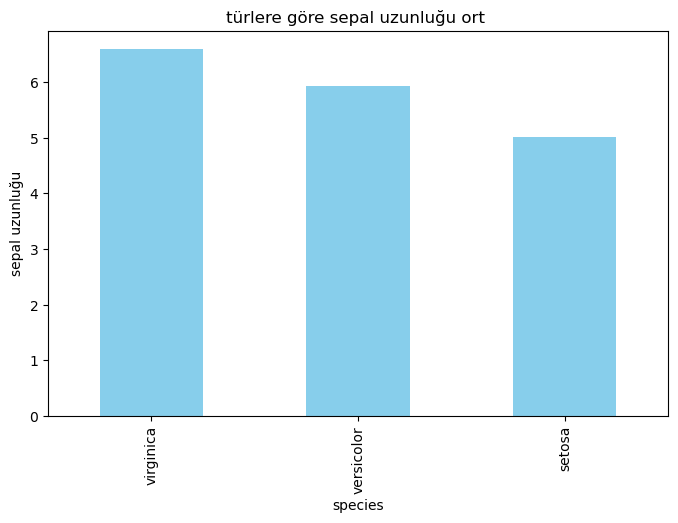

In [27]:
# use sorting to look for differences between the species
sorted_sepal = df.groupby('species')['sepal_length'].mean().sort_values(ascending=False)

#  görselleştirme
sorted_sepal.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title("türlere göre sepal uzunluğu ort ")
plt.ylabel("sepal uzunluğu")
plt.show()

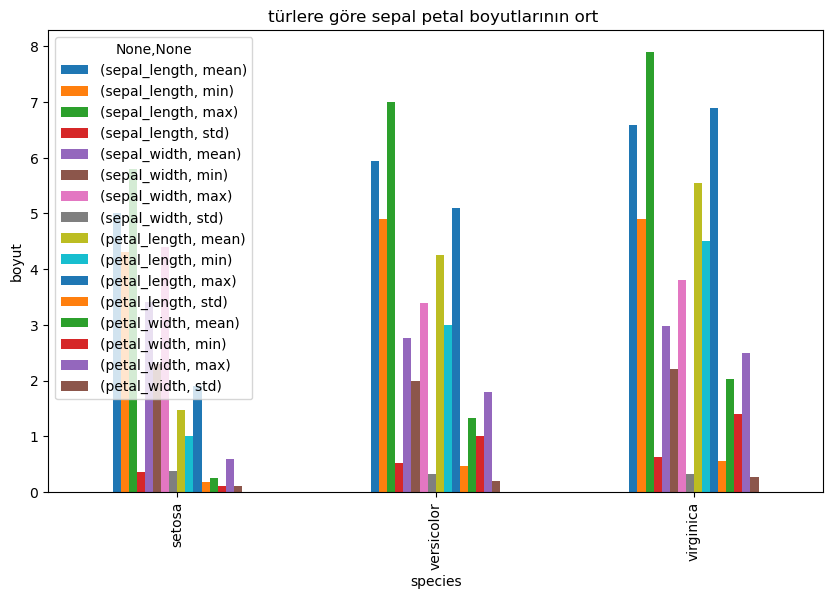

In [29]:
# use plotting to look for differences between the species
group.plot(kind='bar', figsize=(10, 6))
plt.title("türlere göre sepal petal boyutlarının ort ")
plt.ylabel("boyut")
plt.show()

In [ ]:
# map species to a numeric value so that plots can be colored by category


## Task 4

In [33]:
# define function that accepts a row of data and returns a predicted species
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species_numeric'] = df['species'].map(species_map)

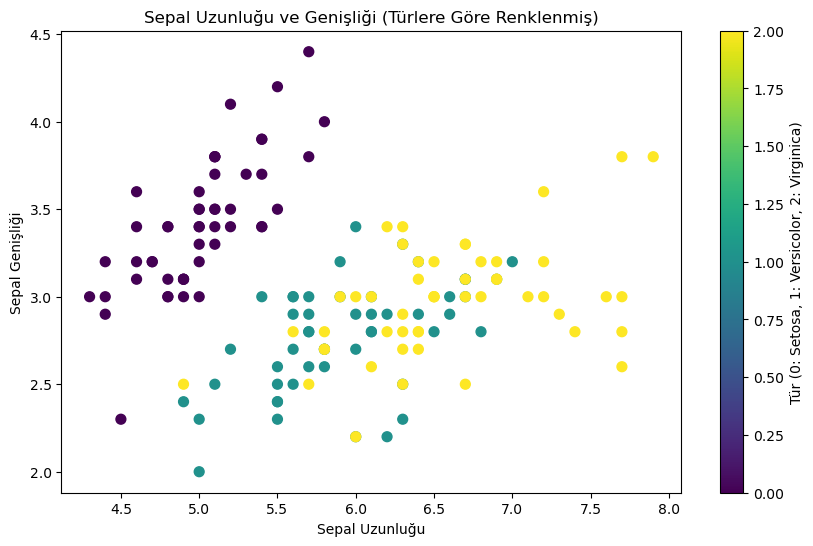

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species_numeric'], cmap='viridis', s=50)
plt.title("Sepal Uzunluğu ve Genişliği (Türlere Göre Renklenmiş)")
plt.xlabel("Sepal Uzunluğu")
plt.ylabel("Sepal Genişliği")
plt.colorbar(label='Tür (0: Setosa, 1: Versicolor, 2: Virginica)')
plt.show()